<a href="https://colab.research.google.com/github/mounika-0124/Fake_News_Detection/blob/main/fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


In [4]:
fake = pd.read_csv("/content/Fake.csv")
true = pd.read_csv("/content/True.csv")

In [5]:
fake.shape

(23481, 4)

In [6]:
true.shape

(21417, 4)

In [7]:
fake['target'] = 'fake'
true['target'] = 'true'

In [8]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [9]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [10]:
data.head()

,title,text,subject,date,target
0,Hungary's Jobbik supports EU deepening with vo...,BUDAPEST (Reuters) - Hungary s main opposition...,worldnews,"October 27, 2017",true
1,Reince Priebus Says We ARE Going Forward With...,"On CNN s State of the Union yesterday, Reinc...",News,"November 21, 2016",fake
2,FLASHBACK To 2014 WaPo Headline: “Obama Should...,"Yesterday, the leftist media spent the day wri...",left-news,"Dec 2, 2017",fake
3,Trump Gives Insane Warning On Religious Right...,Donald Trump is continuing his campaign of fea...,News,"September 9, 2016",fake
4,OPEN BORDERS BERNIE Threatens Sheriff Arpaio F...,Just what America needs another President who ...,politics,"Mar 20, 2016",fake


In [11]:
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Hungary's Jobbik supports EU deepening with vo...,BUDAPEST (Reuters) - Hungary s main opposition...,worldnews,true
1,Reince Priebus Says We ARE Going Forward With...,"On CNN s State of the Union yesterday, Reinc...",News,fake
2,FLASHBACK To 2014 WaPo Headline: “Obama Should...,"Yesterday, the leftist media spent the day wri...",left-news,fake
3,Trump Gives Insane Warning On Religious Right...,Donald Trump is continuing his campaign of fea...,News,fake
4,OPEN BORDERS BERNIE Threatens Sheriff Arpaio F...,Just what America needs another President who ...,politics,fake


In [12]:
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,BUDAPEST (Reuters) - Hungary s main opposition...,worldnews,true
1,"On CNN s State of the Union yesterday, Reinc...",News,fake
2,"Yesterday, the leftist media spent the day wri...",left-news,fake
3,Donald Trump is continuing his campaign of fea...,News,fake
4,Just what America needs another President who ...,politics,fake


In [13]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,budapest (reuters) - hungary s main opposition...,worldnews,true
1,"on cnn s state of the union yesterday, reinc...",News,fake
2,"yesterday, the leftist media spent the day wri...",left-news,fake
3,donald trump is continuing his campaign of fea...,News,fake
4,just what america needs another president who ...,politics,fake


In [14]:
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [15]:
data.head()

,text,subject,target
0,budapest reuters hungary s main opposition jo...,worldnews,true
1,on cnn s state of the union yesterday reince...,News,fake
2,yesterday the leftist media spent the day wrin...,left-news,fake
3,donald trump is continuing his campaign of fea...,News,fake
4,just what america needs another president who ...,politics,fake


In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
data.head()

,text,subject,target
0,budapest reuters hungary main opposition jobbi...,worldnews,true
1,cnn state union yesterday reince priebus field...,News,fake
2,yesterday leftist media spent day wringing han...,left-news,fake
3,donald trump continuing campaign fearmongering...,News,fake
4,america needs another president makes laws fit...,politics,fake


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


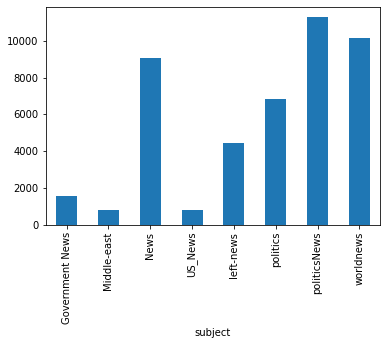

In [18]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


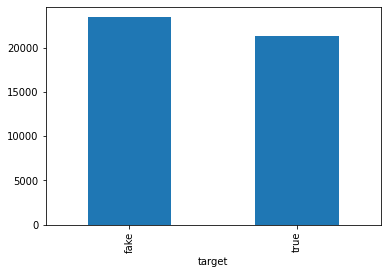

In [19]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [20]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

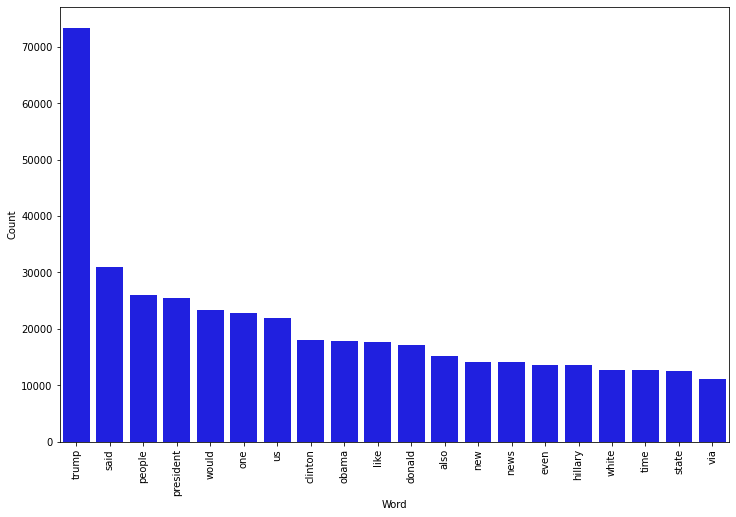

In [21]:
counter(data[data["target"] == "fake"], "text", 20)

In [22]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [24]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 95.37%


In [25]:
import sklearn.metrics as metrics

Confusion matrix, without normalization


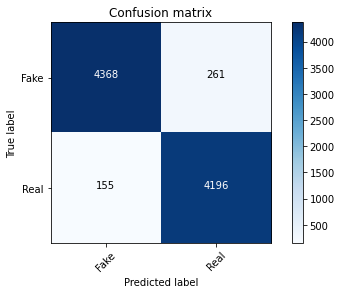

In [26]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])